<a href="https://colab.research.google.com/github/ayaka-honda/lesson_ai/blob/master/Titanic%E7%99%BA%E8%A1%A8%E7%94%A8(0_76555).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
X='Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex','Embarked'
SVC(gamma=0.1,C=10)

In [0]:
import pandas as pd
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score

In [0]:
# データの読み込み
data_original=pd.read_csv('train.csv')
data=data_original.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# 基礎統計量を確認
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# 中央値を確認
data.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

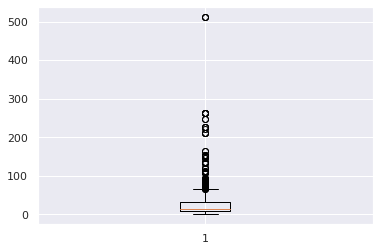

In [0]:
# 箱ひげ図で'Fare'の分布を確認
plt.boxplot(data['Fare'])
plt.show()

In [0]:
# Pclassごとの平均値を確認
data.groupby('Pclass').mean()
## SurvivedはPclassに比例する
## AgeはPclassに比例する
## FareはPcassに比例する
## Pclass３→家族連れが多い＆生存率が低い

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [0]:
# trainデータの欠損値確認
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# テストデータの読み込みと欠損値確認
test_original=pd.read_csv('test.csv')
test=test_original.copy()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
# Fareの外れ値を削除
data['Fare'].replace(0,np.nan,inplace=True)
data=data[data['Fare']<300]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


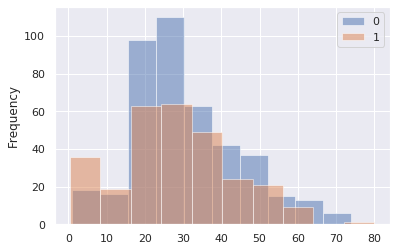

In [0]:
# 年齢ごとの生存率を確認
data.groupby('Survived')['Age'].plot(kind='hist', alpha=0.5)
plt.legend()
## 10才以下が正しく判断できるかがキー？

In [0]:
# Ageをクラスごとの中央値で補完
data_class1= data[data['Pclass']==1]
data_class1['Age_fill']=data[data['Pclass']==1]['Age'].median()
data_class1['Age'].fillna(data_class1['Age_fill'], inplace=True)
data_class1.drop(['Age_fill'], axis=1,inplace=True)

In [0]:
data_class2= data[data['Pclass']==2]
data_class2['Age_fill']=data[data['Pclass']==2]['Age'].median()
data_class2['Age'].fillna(data_class2['Age_fill'], inplace=True)
data_class2.drop(['Age_fill'], axis=1,inplace=True)

In [0]:
data_class3= data[data['Pclass']==3]
data_class3['Age_fill']=data[data['Pclass']==3]['Age'].median()
data_class3['Age'].fillna(data_class3['Age_fill'], inplace=True)
data_class3.drop(['Age_fill'], axis=1,inplace=True)

In [0]:
data=pd.concat([data_class1, data_class2, data_class3])
data.sort_index(inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
y=data['Survived']
X= data.drop('Survived', axis=1)
X_dummies=pd.get_dummies(X)
X_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [0]:
# preprocessing test data
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [0]:
data.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    15.0229
3     8.0500
Name: Fare, dtype: float64

In [0]:
test['Fare'].fillna(8,inplace=True)

In [0]:
test_class1= test[test['Pclass']==1]
test_class1['Age_fill']=test[test['Pclass']==1]['Age'].median()
test_class1['Age'].fillna(test_class1['Age_fill'], inplace=True)
test_class1.drop(['Age_fill'], axis=1,inplace=True)

test_class2= test[test['Pclass']==2]
test_class2['Age_fill']=test[test['Pclass']==2]['Age'].median()
test_class2['Age'].fillna(test_class2['Age_fill'], inplace=True)
test_class2.drop(['Age_fill'], axis=1,inplace=True)

test_class3= test[test['Pclass']==3]
test_class3['Age_fill']=test[test['Pclass']==3]['Age'].median()
test_class3['Age'].fillna(test_class3['Age_fill'], inplace=True)
test_class3.drop(['Age_fill'], axis=1,inplace=True)

test=pd.concat([test_class1, test_class2, test_class3])
test.sort_index(inplace=True)

In [0]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
X_test_dummies=pd.get_dummies(test)
X_test_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,24.0,0,0,8.0500,0,1,0,0,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, stratify=y, test_size=0.3, random_state=0)

# Standarlized
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

scores={}
for gamma in np.logspace(-3, 2, num=6):
  for C in np.logspace(-3, 2, num=6):
    model=SVC(gamma=gamma, C=C)
    model.fit(X_train_std, y_train)
    scores[(gamma, C)]=model.score(X_test_std, y_test)


scores=pd.Series(scores)
print('Best score:{:.3f}'.format(scores.max()))
print('paramaters(gamma,C):{}'.format(scores.idxmax()))

Best score:0.855
paramaters(gamma,C):(0.1, 10.0)


In [0]:
model=SVC(gamma=0.1,C=10,random_state=0)
model.fit(X_train_std, y_train)


print('score(train):{}'.format(model.score(X_train_std, y_train)))
print('score(test):{}'.format(model.score(X_test_std, y_test)))

score(train):0.8440065681444991
score(test):0.8549618320610687


In [0]:
# # K分割
# model2=SVC(gamma=0.01,C=1,random_state=0)
# scores= cross_val_score(model2, X_dummies, y, cv=6)

# print('cross_val_score(train):{}'.format(scores))
# print('cross_val_score(test):{:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

cross_val_score(train):[0.631 0.738 0.725 0.709 0.728 0.776]
cross_val_score(test):0.718+-0.044


In [0]:
sc_test = StandardScaler()
sc_test.fit(X_test_dummies)
X_std = sc.transform(X_test_dummies)
predict = model.predict(X_std)

In [0]:
test_original['Survived']=predict
test_result=test_original[['PassengerId','Survived']]
test_result.set_index('PassengerId', inplace=True)
test_result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [0]:
test_result.to_csv('titanic_result.csv')